In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
data = pd.read_csv('/Users/joangalibrull/Downloads/regression_data1.csv')
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


ACTIVITY 1

1.Draw a box plot for the IC2.
2.Print the descriptive statistics for IC2.
3.Remove the outliers from the column IC2.

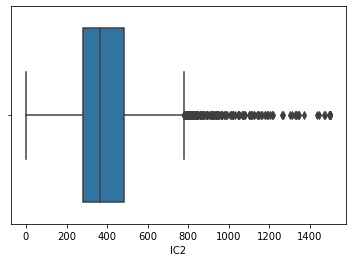

In [82]:
#1.Draw a box plot for the IC2.
# data = data[(data['IC1']<lower_limit) & (data['IC1'])]
# sns.displot
sns.boxplot(x=data['IC2'])
plt.show()

In [83]:
#2.Print the descriptive statistics for IC2.
data['IC2'].describe()

count    4843.000000
mean      401.913690
std       182.660078
min         0.000000
25%       283.000000
50%       366.000000
75%       481.000000
max      1500.000000
Name: IC2, dtype: float64

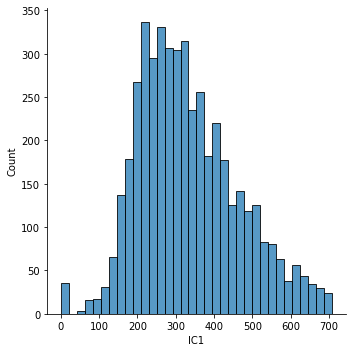

In [84]:
#3.Remove the outliers from the column IC2.
iqr = np.percentile(data['IC1'],75) - np.percentile(data['IC1'],25)
upper_limit = np.percentile(data['IC1'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC1'],25) - 1.5*iqr
data = data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)]
sns.displot(data['IC1'])
plt.show()

In [85]:
#End Activity1

Two features:
    1. number of children (1,10)
    2. income (0-milions)
    
Objective: get them both into similar ranges

<ipython-input-86-682e7f7652d5>:5: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


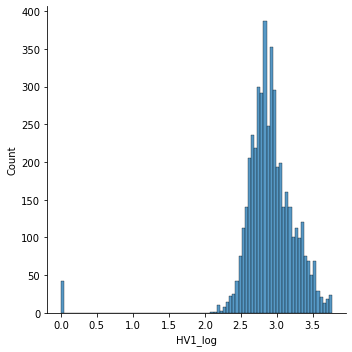

In [86]:
# We can use 10log to get the income into a similar range as the n of children
# We will use Log transofmration: reduce range of 0 - 100000 to range of 0-5

def log_transform_clean(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
    
data['HV1_log'] = list(map(log_transform_clean, data['HV1']))       
sns.displot(data['HV1_log'])
plt.show()

<ipython-input-87-f14695edd9ab>:5: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


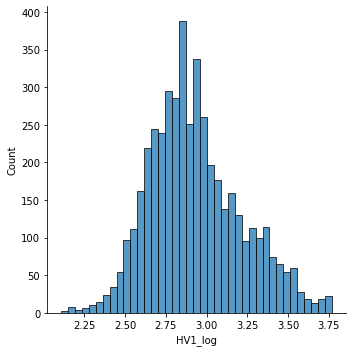

In [87]:
# If there is a nul value, we can use the "fillna" function 
#to replace it by a value.

def log_transform_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
data['HV1_log'] = list(map(log_transform_clean1, data['HV1']))

####  Look at Jan notes on how to fillna function   ####

sns.displot(data['HV1_log'])
plt.show()


ACTIVITY 2

1.Repeat the process(log transformation) for the column IC3. Define the function again yourself.

2.Remove the tails of the transformed column to make it closer to the normal distribution. This time change the factor from 1.5 to 3 when calculating the upper limit and the lower limit. Check the distribution plot. Does it remove the tails effectively? If not change the factor back to 1.5 and see the results.

<ipython-input-88-461ca384a037>:4: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)   #it is needed to put all the features in the same scale


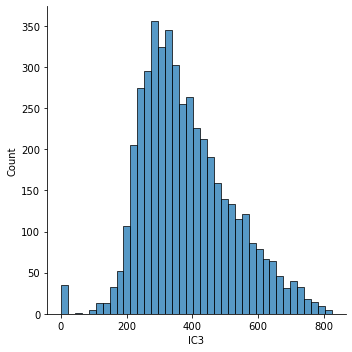

In [88]:
# 1.Repeat the process(log transformation) for the column IC3. 
#Define the function again yourself.
def log_transform_clean1(x):
    x = np.log10(x)   #it is needed to put all the features in the same scale
    if np.isfinite(x):
        return x
    else:
        return 0
    
data['IC3_log'] = list(map(log_transform_clean1, data['IC3']))
           
sns.displot(data['IC3'])
plt.show()

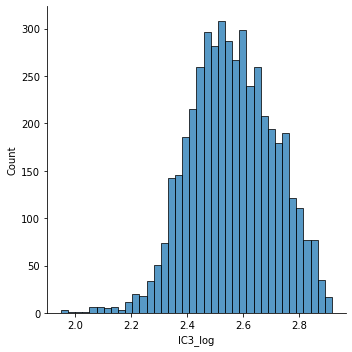

In [89]:
# 2.Remove the tails of the transformed column to make it closer to 
#the normal distribution. This time change the factor from 1.5 to 3 
#when calculating the upper limit and the lower limit. 
# Check the distribution plot. Does it remove the tails effectively? 
# If not change the factor back to 1.5 and see the results.

iqr1 = np.percentile(data['IC3_log'],75) - np.percentile(data['IC3_log'],25)
upper_limit = np.percentile(data['IC3_log'],75) + 3*iqr1
lower_limit = np.percentile(data['IC3_log'],25) - 3*iqr1
data = data[(data['IC3_log']>lower_limit) & (data['IC3_log']<upper_limit)]
sns.displot(data['IC3_log'])
plt.show()

In [106]:
 # BoxCox transformation - another way to get data in the normalized form

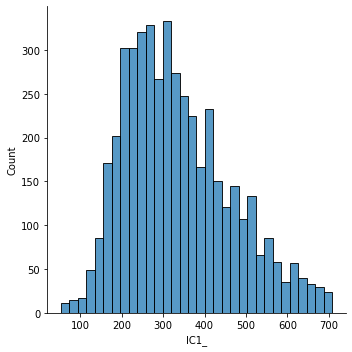

In [90]:
# BoxCox does not like negative values (all values should be +)
# Since median household income, we can filter out negative values:
# if you do not want to lose this data, replate 0s with the mean of the column
len(data[data['IC1']<=0])
data['IC1_'] = np.where(data['IC1']<=0,0,data['IC1']) #np.where replaces ic1 that are negative with 0, others stay the same

# now calculation of the mean new column, excluding the zeros in the count
mean = np.sum(data['IC1_'])/len(data[data['IC1_']>0])

# replacing zeros(0) values with the mean
data['IC1_'] = data['IC1_'].replace(0,mean) 

sns.displot(data['IC1_'])
plt.show()

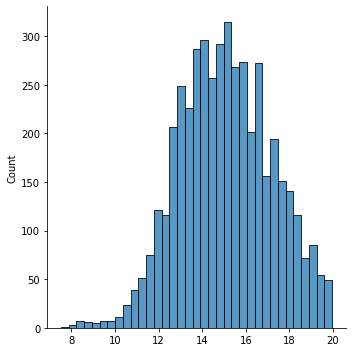

In [91]:
#Make it Normal Distribution and reduce the scale of the values

from scipy import stats
xt, lmbda = stats.boxcox(data['IC1_'])
sns.displot(xt)
plt.show()
#name for the output values

ACTIVITY 3
1. Repeat the same steps for column IC5 for box-cox transformation.

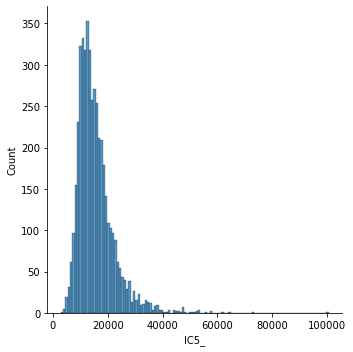

In [92]:
len(data[data['IC5']<=0])
data['IC5_'] = np.where(data['IC5']<=0,0,data['IC5']) 
#np.where replaces ic5 that are negative with 0, from our data.

# now calculation of the mean new column, excluding the zeros in the count
mean = np.sum(data['IC5_'])/len(data[data['IC5_']>0])

# replace the 0 values with the mean
data['IC5_'] = data['IC5_'].replace(0,mean)

sns.displot(data['IC5_'])
plt.show()

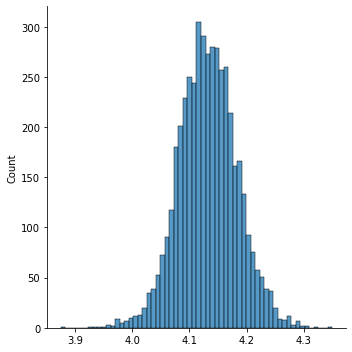

In [93]:
from scipy import stats #contain statisticals method like boxplox
data = data.drop(['IC5'], axis=1)
#we delete the IC5 columns bc we the new IC5_ column
#which has no 0 nor negative values.

xt2, lmbda2 = stats.boxcox(data['IC5_'])
#We need a second variable

sns.displot(xt2)
plt.show()

In [100]:
data['IC1_boxcoxtransformed'] = xt
data['IC5_boxcoxtransformed'] = xt2
#data = data.drop(['IC1_','IC5_','IC1',], axis=1)
#already droped but lost it.
data.head()

,HV1,IC2,IC3,IC4,AVGGIFT,TARGET_D,HV1_log,IC3_log,IC1_transformed,IC5_transformed,IC1_boxcoxtransformed,IC5_boxcoxtransformed
0,2346,446,468,503,15.500000,21.0,3.370328,2.670246,16.640264,4.135749,16.640264,4.135749
1,497,364,357,384,3.080000,3.0,2.696356,2.552668,15.596224,4.105672,15.596224,4.105672
2,1229,502,507,544,7.500000,20.0,3.089552,2.705008,17.299821,4.158703,17.299821,4.158703
3,325,181,171,209,6.700000,5.0,2.511883,2.232996,11.355808,4.013508,11.355808,4.013508
4,768,201,220,249,8.785714,10.0,2.885361,2.342423,12.073626,4.046167,12.073626,4.046167


In [101]:
 # Normalizing and Scaling transformations
    
#Normalizing: They either reduce the scale of a figure
#Scaling Look like a normal distribution

In [110]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/Users/joangalibrull/Downloads/regression_data1.csv')

In [104]:
data['HV1'].describe()

count    4843.000000
mean     1163.701425
std      1032.104682
min         0.000000
25%       548.000000
50%       809.000000
75%      1367.500000
max      5982.000000
Name: HV1, dtype: float64

In [105]:
# Normalizing maps the minimum value to 0, the maximum
#to 1 and make sure all the other values range between is
#kept in swing.

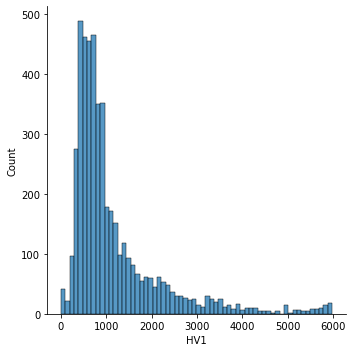

In [107]:
sns.displot(data['HV1'])
plt.show()

In [108]:
# Standard Scaler subtracts from each value the mean value
# It maps things from -3 to 3, not from 0 to 1 like Normalizing

Let's try both data transformation methods

In [111]:
Y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1) #everything else apart from target
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [114]:
X

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,2346,420,446,468,503,14552,15.500000
1,497,350,364,357,384,11696,3.080000
2,1229,469,502,507,544,17313,7.500000
3,325,148,181,171,209,6334,6.700000
4,768,174,201,220,249,7802,8.785714
...,...,...,...,...,...,...,...
4838,701,297,335,405,468,15258,15.500000
4839,3357,284,455,343,447,24240,11.857143
4840,700,322,415,356,446,14360,11.333333
4841,601,206,225,251,289,9801,13.000000


In [118]:
# MinMaxScaler data: make data range from 0 - 1, instead of from min to max
#it doesn't care about normal distribution.


#define a normalizer by calling it fit(X_num)
transformer = MinMaxScaler().fit(X_num)
#transform xnum
x_normalized = transformer.transform(X_num)
# We are applying the same transformation
#to all the columns, however, we should transform
#considering better the column values/type

print(x_normalized.shape)
pd.DataFrame(x_normalized, columns=X_num.columns)
# typed columns=X_num.columns to keep the columns name

(4843, 7)


,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,0.158850,0.028439,0.030199,0.031689,0.034059,0.985333,0.001050
1,0.042373,0.029840,0.031034,0.030437,0.032739,0.997172,0.000263
2,0.070689,0.026976,0.028874,0.029161,0.031289,0.995797,0.000431
3,0.051162,0.023298,0.028493,0.026919,0.032901,0.997106,0.001055
4,0.097819,0.022162,0.025601,0.028021,0.031715,0.993727,0.001119
...,...,...,...,...,...,...,...
4838,0.045837,0.019420,0.021905,0.026482,0.030602,0.997699,0.001014
4839,0.137112,0.011600,0.018584,0.014009,0.018257,0.990046,0.000484
4840,0.048618,0.022364,0.028824,0.024726,0.030977,0.997363,0.000787
4841,0.061129,0.020953,0.022885,0.025530,0.029395,0.996887,0.001322


In [120]:
# Scaling Standard Scaler: make data normal distributed with mean=0 and std=1


transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns)

(4843, 7)


,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,1.145640,0.392017,0.241382,0.402231,0.322435,-0.203394,0.361021
1,-0.646030,-0.016528,-0.207586,-0.263776,-0.351134,-0.504086,-0.862998
2,0.063274,0.677998,0.547994,0.636234,0.554505,0.087295,-0.427397
3,-0.812697,-1.195472,-1.209550,-1.379790,-1.341676,-1.068619,-0.506239
4,-0.383432,-1.043726,-1.100046,-1.085786,-1.115266,-0.914062,-0.300687
...,...,...,...,...,...,...,...
4838,-0.448355,-0.325855,-0.366367,0.024227,0.124327,-0.129064,0.361021
4839,2.125293,-0.401727,0.290659,-0.347777,0.005462,0.816598,0.002009
4840,-0.449324,-0.179946,0.071650,-0.269776,-0.000199,-0.223609,-0.049613
4841,-0.545254,-0.856963,-0.968641,-0.899784,-0.888857,-0.703599,0.114640


Use this techniques to improve the signal (algorithms)
have an easy time.

## Rules of thumb
- If I'm talking about the future, what matters is if the values is very extrem, then use the Standar Scaler. It will take the more extrem values.

- If the feature is to understand how far away is a piece of information from others, use Normalizer as we can compare easiy, 0-1.

ACTIVITY 4

1.Load data regression_data.csv again

2.Select 3 numeric columns.

3.Plot distributions.

4.Normalize. (use normalizer)

5.Plot new distributions.

In [147]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/Users/joangalibrull/Downloads/regression_data.csv')

In [148]:
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2000.0,458,453,495,469.0,19217,13.511111,38.0
1,817.0,213,256,240,236.0,8518,12.222222,10.0
2,1866.0,405,423,394,407.0,15709,23.857143,37.0
3,1174.0,268,282,298,283.0,10427,10.400000,12.0
4,3048.0,470,557,562,530.0,31631,8.222222,15.0


In [149]:
# 2.Select 3 numeric columns.
data1 = data[['HV1','IC2','AVGGIFT']]
data1

,HV1,IC2,AVGGIFT
0,2000.0,453,13.511111
1,817.0,256,12.222222
2,1866.0,423,23.857143
3,1174.0,282,10.400000
4,3048.0,557,8.222222
...,...,...,...
995,1837.0,409,11.333333
996,1591.0,472,15.000000
997,632.0,246,8.142857
998,583.0,274,3.687500


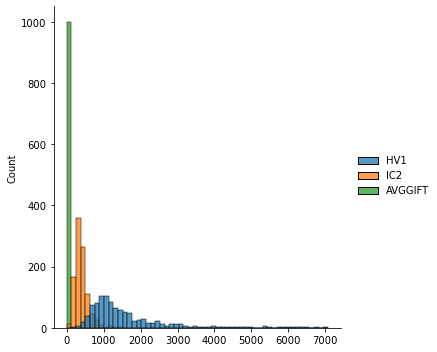

In [150]:
#3.Plot distributions.

sns.displot(data1)
plt.show()

In [152]:
# 4.Normalize. (use MinMaxScaler)
transformer = MinMaxScaler().fit(data1)

data1_normalized = transformer.transform(data1)
print(data1_normalized.shape)
pd.DataFrame(data1_normalized, columns=data1.columns)

(1000, 3)


,HV1,IC2,AVGGIFT
0,0.267071,0.302000,0.228814
1,0.096290,0.170667,0.202600
2,0.247726,0.282000,0.439237
3,0.147827,0.188000,0.165538
4,0.418363,0.371333,0.121245
...,...,...,...
995,0.243540,0.272667,0.184521
996,0.208027,0.314667,0.259096
997,0.069583,0.164000,0.119631
998,0.062509,0.182667,0.029016


In [ ]:
# Plot new distributions.

sns.displot(data1_normalized)
plt.show()

# MinMax Scale changes de values to 0 - 1 but it doesn't change the shape of the plot